## Network Science Assignment 5 (HS22)

David Diener 19-733-179

Rafael Dubach 18-755-180

In [3]:
#!pip install powerlaw 

In [4]:
import math as m
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from typing import Tuple, List, Dict
from networkx.algorithms.community import modularity
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.generators.random_graphs import gnm_random_graph
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import binomial_graph
from networkx.algorithms.cluster import average_clustering
from networkx import is_connected, connected_components, watts_strogatz_graph,average_shortest_path_length
from scipy.special import factorial
from scipy.stats import poisson, expon
import powerlaw
from networkx.algorithms.assortativity import degree_pearson_correlation_coefficient
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.algorithms import diameter

In [5]:
graphs = {}
graphs_random = {}
graphs['Amazon'] = nx.read_gml(r"C:\Users\Rafael\Downloads\data-assignment5\graph_amazon.gml")
graphs['Escort'] = nx.read_gml(r"C:\Users\Rafael\Downloads\data-assignment5\graph_escort.gml")
graphs['Internet'] = nx.read_gml(r"C:\Users\Rafael\Downloads\data-assignment5\graph_internet.gml")

for key, graph in graphs.items():
    graphs_random[key] = random_reference(graph, connectivity=False)

A05.1 Everyday networks are not Poisson: parameter estimation and model selection

Task: For all given networks compute the degree
distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).
1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error
2. In the same plot show: the empirical degree distribution; the power-law fit; the Poisson fit and the exponential distribution with mean value equal to ⟨𝑘⟩. Which distribution is more likely to describe the data?
3. What does it mean in practice for Amazon products?

In [26]:
def avg_deg(g):
    return sum(dict(g.degree()).values()) / g.number_of_nodes()

def pois(k,𝜆) :
    deg = sorted(list(set(k)))
    prob = [poisson.pmf(deg[i],𝜆) for i in range(len(deg))]   
    return deg, prob

def exp(k,𝜆):
  prob = [((𝜆**-1)*m.exp(-k[i]/𝜆))  for i in range(len(k))]
  return k, prob

Calculating best minimal value for power law fit
Power-law:  3.581389902353215
Error:  0.033493488557519914
Avg. deg.:  5.529855493141971


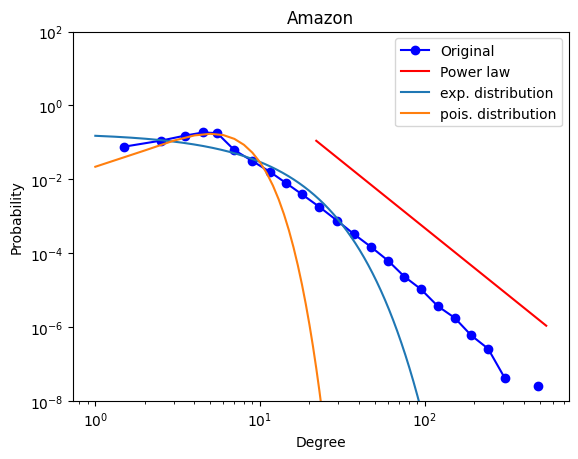

--------------------------------------------------------

Calculating best minimal value for power law fit
Power-law:  2.8703860553637544
Error:  0.07579186776002865
Avg. deg.:  4.667543335325762


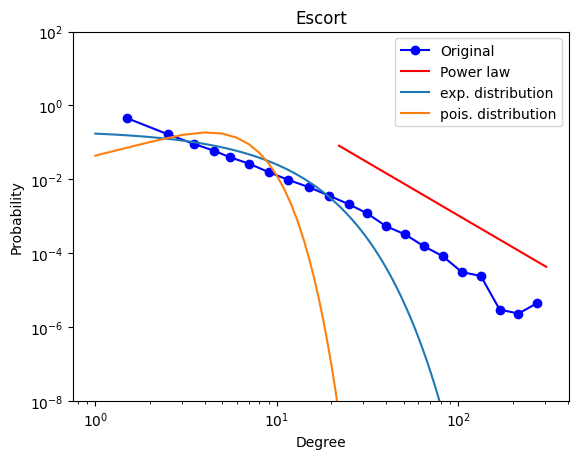

--------------------------------------------------------

Calculating best minimal value for power law fit
Power-law:  1.9157988569314632
Error:  0.013180032052154154
Avg. deg.:  6.197750352406432


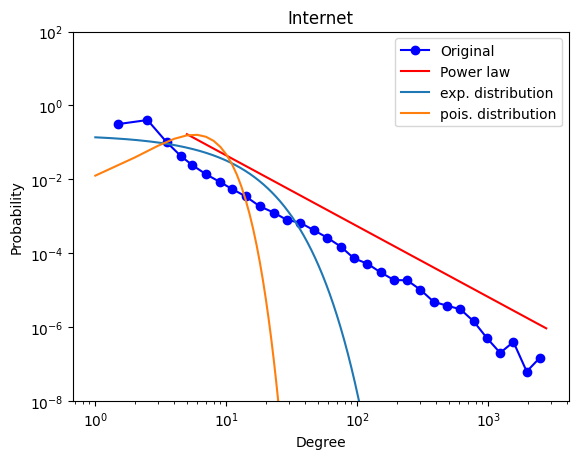

--------------------------------------------------------



In [27]:
import warnings
for k_n,v_n in graphs.items():
  k = np.asarray([d for d in dict(v_n.degree()).values()])
  spacing = np.linspace(min(k),max(k),len(k))
  # discrete=True
  fit = powerlaw.Fit(k, discrete=True)
  print("Power-law: " ,fit.power_law.alpha)
  print("Error: ", fit.power_law.sigma)
  mu = avg_deg(v_n)
  print("Avg. deg.: ", mu)
  warnings.filterwarnings("ignore")

  deg, dis = pois(k,mu)
  space,expon = exp(spacing, mu)
  #like handson5
  powerlaw.plot_pdf(k,color='b',marker='o',  label="Original")
  fit.power_law.plot_pdf(color='r', label="Power law")
  plt.plot(space,expon, label="exp. distribution")
  plt.plot(deg, dis, label="pois. distribution")
  plt.xlabel("Degree")
  plt.ylabel("Probability")
  plt.legend()
  plt.title(k_n)
  # for better understanding / nicer representation.
  plt.ylim([10**-8,100])
  plt.show()
  print("--------------------------------------------------------\n")

**3 Amazon products:**

The power law is a likely distribution to describe the data when the degree is increased. The exponential distribution predicts also quite well in an early stage.

For a new node in the amazon network, the probability of linking with a high-degree node is higher than linking with a low-degree node. Indicating which products are more likely to be co-purchased with another product.

# A05.2 Barabási-Albert model 

Task: Build networks with the Barabási-Albert model. Connect 𝑚 = 3 for each newnode and grow until 𝑁 = 50, 100, 500, 1000, 5000.

1. Compute the average clustering coefficient, assortativity, average shortest path length and diameter for the generated networks
2. Produce randomised versions of the same networks and calculate the same quantities, then plot them as functions of 𝑁 and compare with the non-randomised ones (use log x axis)
A5: Scale-Free Networks |
3. Which of these measures is relatively unchanged by
randomisation? Why?

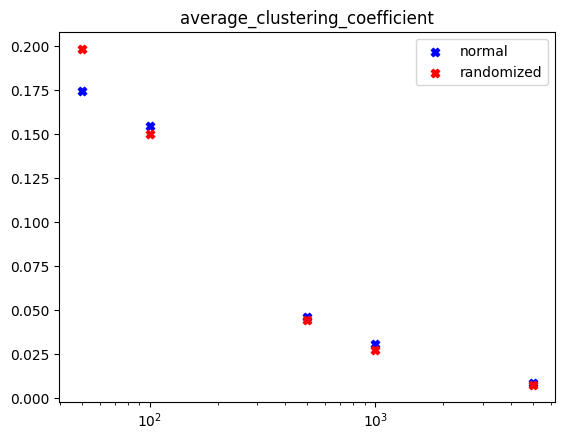

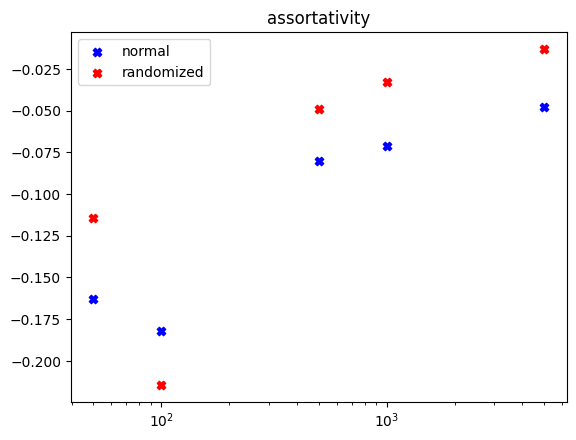

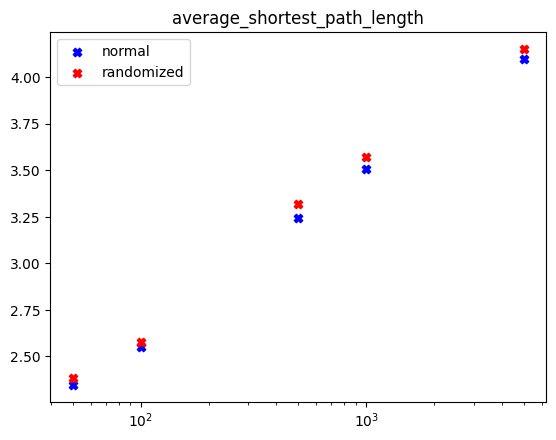

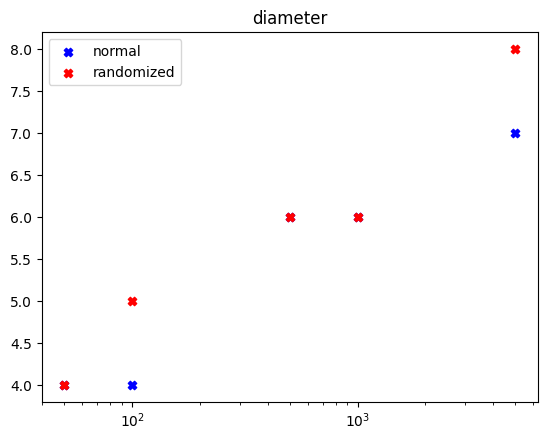

In [243]:
def get_data(graph):
    data = {
        "average_clustering_coefficient": average_clustering(graph),
        "assortativity": degree_pearson_correlation_coefficient(graph),
        "average_shortest_path_length": average_shortest_path_length(graph),
        "diameter": diameter(graph)
    }
    return data

data_normal = {"average_clustering_coefficient": [], "assortativity": [], "average_shortest_path_length": [], "diameter": [] }
data_rand = {"average_clustering_coefficient": [], "assortativity": [], "average_shortest_path_length": [], "diameter": [] }
m, trials, n_range = 3, 100, [50, 100, 500, 1000, 5000]

for n in n_range:
    g = barabasi_albert_graph(n,m)
    r = random_reference(g, niter=10, connectivity=False)
    g_data, r_data = get_data(g), get_data(r)
    [data_normal[key].append(g_data[key]) for key in data_normal.keys()]
    [data_rand[key].append(r_data[key]) for key in data_normal.keys()]
    
for k in data_normal.keys():
    plt.scatter(n_range,data_normal[k], label="normal", color="blue", marker='X')   
    plt.xscale('log') 
    plt.scatter(n_range,data_rand[k], label="randomized", color="red", marker='X')
    plt.legend()
    plt.title(k)
    plt.show()

When the network is randomized, the average shortest path and the average clustering coefficient do not appear to change. This is because the model is created based of preferential attachment process which allocates connections among nodes according to how many connections they already have. This implies that the avg. number of steps for nodes inside the network is kept at a minimum and so there is no noteworthy cluster building going on.

# A05.3 Barabási-Albert model (2)
 
Task: Build networks of 𝑁 = 500 nodes with the BA model, varying the number of new connections 𝑚 ∈ {2, 3, 4, 5}.

1. Plot the degree distributions of the resulting networks 
2. Estimate the power-law fit parameters
3. Plot the power-law exponent 𝛼 as a function of 𝑚

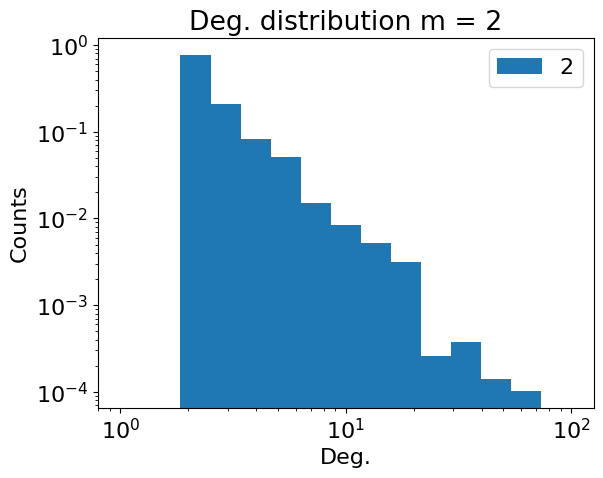

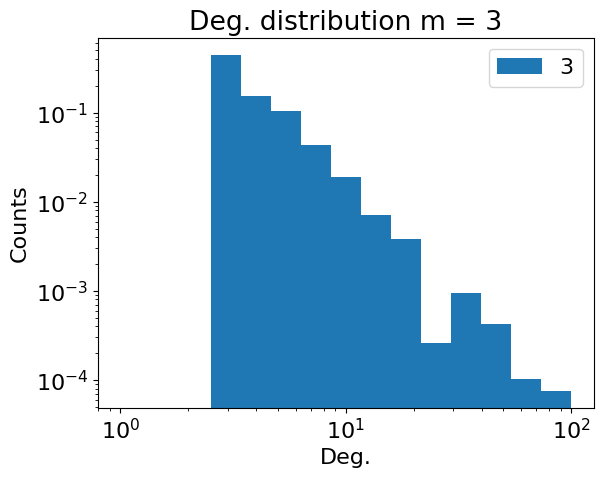

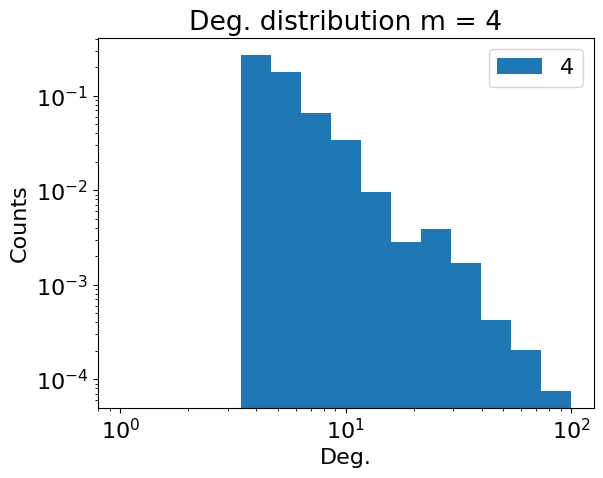

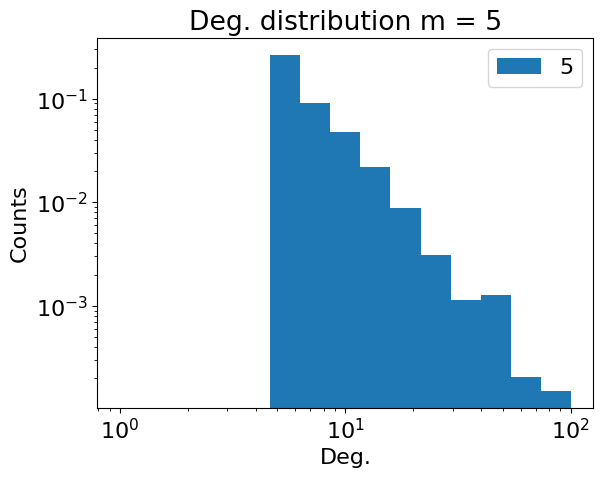

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
xmin progress: 97%

m:  2 alpha:  2.5267845767992663
m:  3 alpha:  2.5635117523005055
m:  4 alpha:  2.662827660434244
m:  5 alpha:  2.8629830362679716

--------------------------------------------------------

m:  2 sigma:  0.09794327626773613
m:  3 sigma:  0.06992237123527487
m:  4 sigma:  0.07436391367195813
m:  5 sigma:  0.12503523455522575


In [90]:
d = {}
alphas = {}
sigmas = {}
for i in range(2,6):
  G = nx.barabasi_albert_graph(500,i)
  d[i] = sorted([d for n,d in G.degree()], reverse=True)
   
# We evaluated the number of bins through the rice rule (https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) which is the most common rule of thumb for choosing the number of bins in a histogram.

def histo(dic):
  for k,v in dic.items():
    bins = np.logspace(0,2,base=10,num = int(np.ceil((len(v)**(1/3))*2)))
    plt.hist(v, bins=bins, density=True, label=k)
    plt.legend()
    plt.title("Deg. distribution m = "+str(k))
    plt.xlabel("Deg.")
    plt.ylabel("Counts")
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

histo(d)

for el in d.keys():
  k = np.asarray(d[el])
  fit = powerlaw.Fit(k, discrete=True)
  alphas[el] = fit.alpha
  sigmas[el] = fit.power_law.sigma

print("\n")
for k,v in alphas.items():
  print("m: ",k,"alpha: ",v)

print("\n--------------------------------------------------------\n") 

for k,v in sigmas.items():
  print("m: ",k,"sigma: ",v)



Text(0, 0.5, 'alpha')

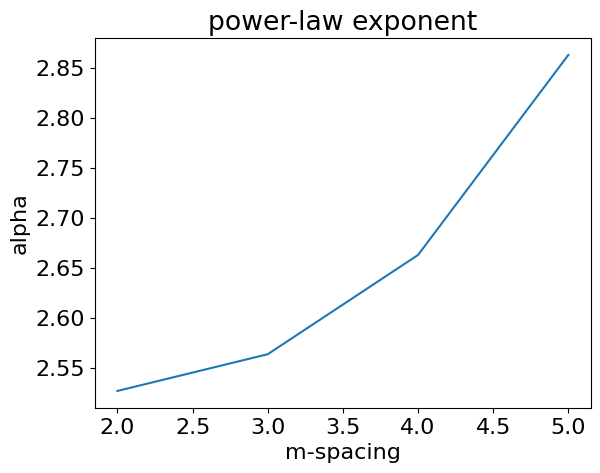

In [92]:
a,m=[],[]
for k,v in alphas.items():
  a.append(v)
  m.append(k)

plt.plot(m,a)
plt.title("power-law exponent")
plt.xlabel("m-spacing")
plt.ylabel("alpha")
